# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
 pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?" 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | anadyr
Processing Record 2 of Set 1 | campo gallo
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | swift current
Processing Record 6 of Set 1 | kapa'a
Processing Record 7 of Set 1 | lihue
Processing Record 8 of Set 1 | west island
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | leticia
Processing Record 12 of Set 1 | bereznik
Processing Record 13 of Set 1 | gornyy
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | keflavik
Processing Record 16 of Set 1 | puerto armuelles
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | ust-tsilma
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 22 of Set 1 | 

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,anadyr,64.7500,177.4833,-10.72,85,100,5.00,RU,1731118408
1,campo gallo,-26.5833,-62.8500,21.39,56,0,2.65,AR,1731118531
2,yellowknife,62.4560,-114.3525,-4.21,93,75,6.71,CA,1731118532
3,waitangi,-43.9535,-176.5597,13.78,93,100,8.41,NZ,1731118533
4,swift current,50.2834,-107.8014,10.45,62,0,8.75,CA,1731118534


In [18]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,-10.72,85,100,5.00,RU,1731118408
1,campo gallo,-26.5833,-62.8500,21.39,56,0,2.65,AR,1731118531
2,yellowknife,62.4560,-114.3525,-4.21,93,75,6.71,CA,1731118532
3,waitangi,-43.9535,-176.5597,13.78,93,100,8.41,NZ,1731118533
4,swift current,50.2834,-107.8014,10.45,62,0,8.75,CA,1731118534


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

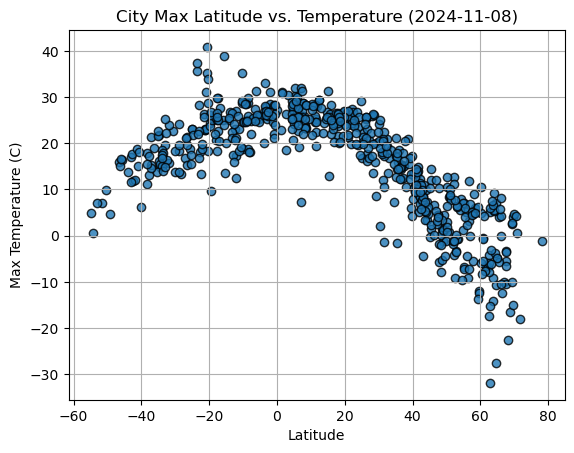

In [20]:
# Build scatter plot for latitude vs. temperature
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

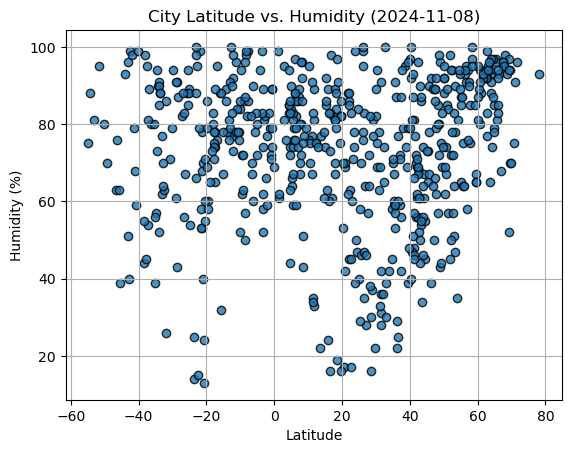

In [21]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

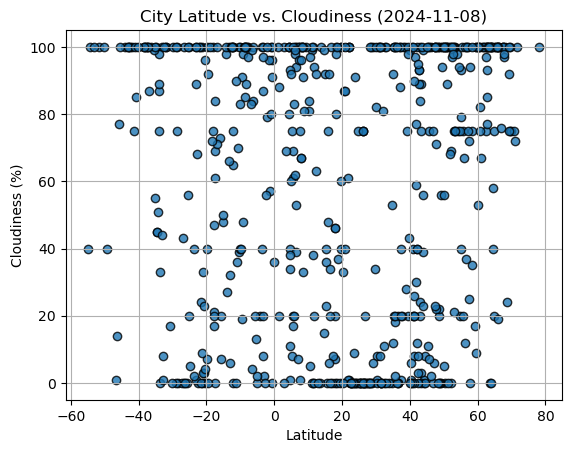

In [22]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

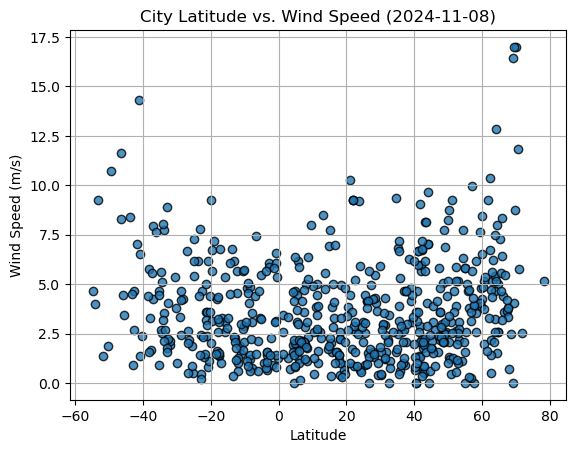

In [23]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"], 
    city_data_df["Wind Speed"],
    edgecolor="black", 
    linewidths=1, 
    marker="o", 
    alpha=0.8,
    label="Cities"
)


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plot
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0),:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,-10.72,85,100,5.00,RU,1731118408
2,yellowknife,62.4560,-114.3525,-4.21,93,75,6.71,CA,1731118532
4,swift current,50.2834,-107.8014,10.45,62,0,8.75,CA,1731118534
5,kapa'a,22.0752,-159.3190,25.18,86,100,9.26,US,1731118315
6,lihue,21.9789,-159.3672,24.77,85,100,9.26,US,1731118504


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0),:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,campo gallo,-26.5833,-62.8500,21.39,56,0,2.65,AR,1731118531
3,waitangi,-43.9535,-176.5597,13.78,93,100,8.41,NZ,1731118533
7,west island,-12.1568,96.8225,26.99,78,75,5.66,CC,1731118537
8,grytviken,-54.2811,-36.5092,0.63,88,100,4.00,GS,1731118538
10,leticia,-4.2153,-69.9406,26.03,94,20,1.03,CO,1731118540


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7730901778177574


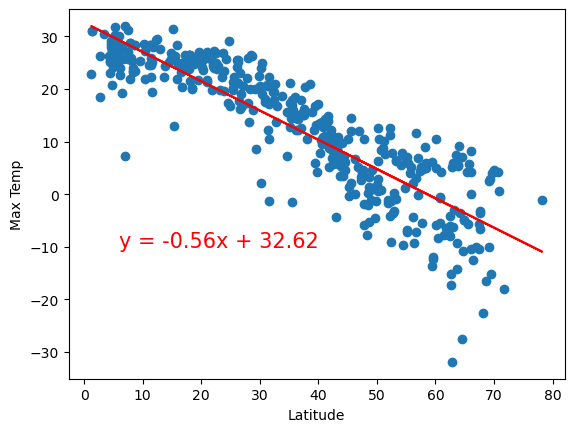

In [27]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6,-10))

The r-value is: 0.43862377590496404


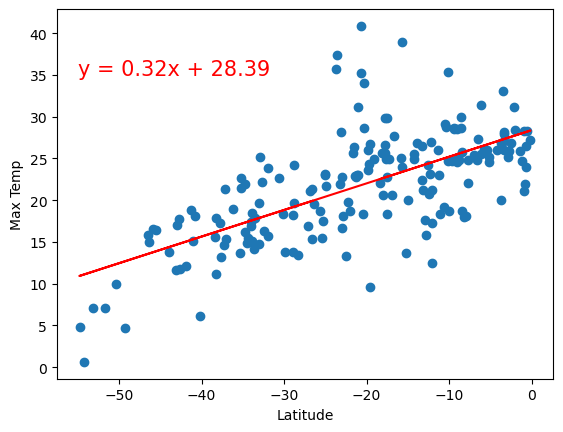

In [28]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 35))

**Discussion about the linear relationship:** YOUR RESPONSE HEREF: 
Temperature vs. Latitude linear regression analysis in both hemispheres, we observe a stronger relationship compared to previous variables like cloudiness and wind speed:

Northern Hemisphere:

The r-value is approximately 0.7731, indicating a strong negative linear relationship between latitude and maximum temperature. This suggests that as latitude increases (moving away from the equator towards the poles in the Northern Hemisphere), maximum temperature tends to decrease significantly.
Southern Hemisphere:

The r-value is approximately 0.4386, showing a moderate negative linear relationship between latitude and maximum temperature. This relationship is weaker than in the Northern Hemisphere but still suggests a general trend where temperatures decrease as latitude moves further from the equator towards the South Pole.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.04375461356609173


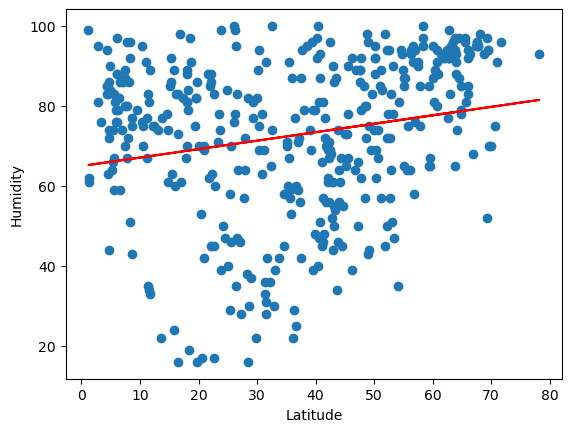

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(40,10))

The r-value is: 0.007920982401607223


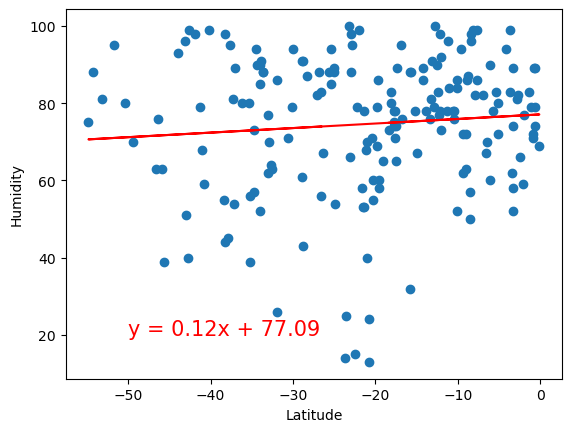

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE:For the Humidity vs. Latitude linear regression analysis in both the Northern and Southern Hemispheres, we observe very weak relationships:

Northern Hemisphere:

The r-value is approximately 0.0438, indicating an extremely weak correlation between latitude and humidity. This suggests that humidity levels are not meaningfully affected by latitude in the Northern Hemisphere.
Southern Hemisphere:

The r-value is approximately 0.0079, which is even weaker than in the Northern Hemisphere, showing virtually no linear relationship between latitude and humidity in the Southern Hemisphere.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.03955094780821501


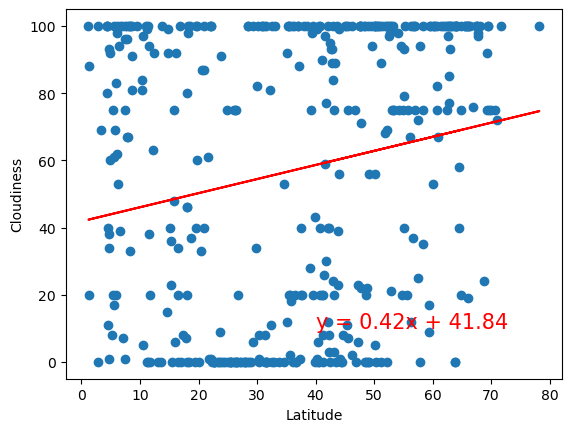

In [31]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40,10))

The r-value is: 0.012369054165865229


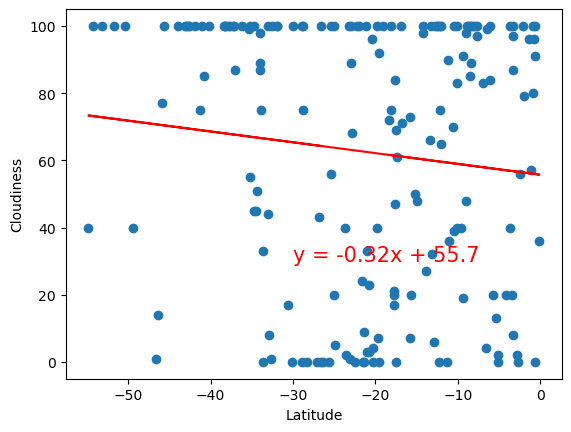

In [32]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE-
Based on the linear regression analysis for cloudiness vs. latitude in both the Northern and Southern Hemispheres, we observe the following:

Northern Hemisphere:

The r-value is approximately 0.0396, suggesting a very weak or almost non-existent linear relationship between latitude and cloudiness. This implies that cloudiness does not show any strong tendency to increase or decrease consistently with latitude in the Northern Hemisphere.
Southern Hemisphere:

The r-value is approximately 0.0124, which is even weaker than in the Northern Hemisphere. This similarly indicates a lack of a significant linear relationship between latitude and cloudiness in the Southern Hemisphere.
Discussion:
In both hemispheres, the very low r-values indicate that latitude does not predict cloudiness well, suggesting that cloudiness is likely influenced by other factors not directly tied to latitude. These factors might include localized weather patterns, humidity levels, or atmospheric conditions that vary independently of latitude. Consequently, cloudiness distribution across latitudes is likely to be more complex and affected by regional climate systems rather than a simple latitude correlation.

This weak relationship indicates that cloudiness might not be strongly linked to latitude, and hence latitude cannot serve as a reliable predictor for cloudiness levels in either hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0714622398338346


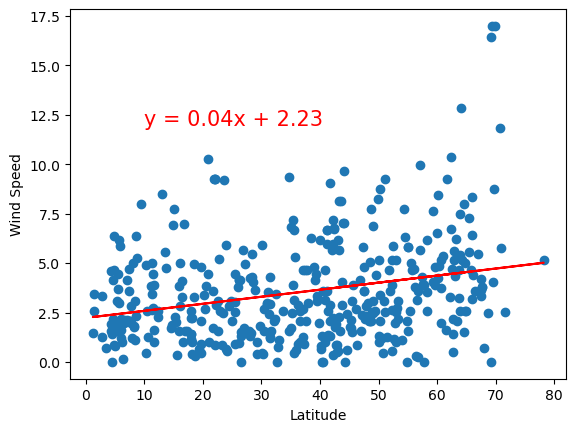

In [33]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10,12))

The r-value is: 0.08511218196010546


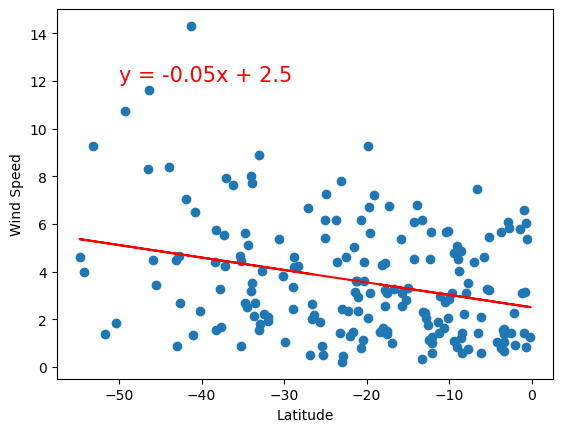

In [34]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 12))

**Discussion about the linear relationship:** YOUR RESPONSE HERE-
For the Wind Speed vs. Latitude linear regression analysis in both the Northern and Southern Hemispheres, the findings are as follows:

Northern Hemisphere:

The r-value is approximately 0.0715, indicating a very weak or negligible linear relationship between latitude and wind speed. This low r-value suggests that wind speed does not vary consistently with latitude in the Northern Hemisphere.
Southern Hemisphere:

The r-value is approximately 0.0851, which is similarly low. This, again, points to a minimal relationship between latitude and wind speed in the Southern Hemisphere.
Discussion:
In both hemispheres, the r-values are very low, indicating that latitude is not a strong predictor of wind speed. Wind speed is often influenced by factors such as topography, proximity to large bodies of water, weather systems, and seasonal changes, which can vary independently of latitude. This suggests that wind speed distribution across latitudes is likely more complex and influenced by regional or local atmospheric conditions rather than a simple latitude-based gradient.

In conclusion, the weak r-values indicate that wind speed does not have a significant linear relationship with latitude. Other environmental and meteorological variables likely play a more important role in determining wind speed patterns in both hemispheres.